In [1]:
import micromagneticdata as mdata
import matplotlib.pyplot as plt
import discretisedfield as df
import ast
import numpy as np

In [2]:
data = mdata.Data(name='mbp_l_1600_w_100_ht_10_ixiooixx')

In [3]:
data.info

,drive_number,date,time,driver,n_threads,t,n
0,0,2023-07-16,10:45:11,MinDriver,None,NaN,NaN
1,1,2023-07-16,10:52:29,MinDriver,None,NaN,NaN
2,2,2023-07-16,10:54:25,TimeDriver,None,5.000000e-09,100.0
3,3,2023-07-16,12:52:44,TimeDriver,None,2.500000e-10,25.0
4,4,2023-07-16,12:59:04,TimeDriver,None,5.000000e-09,100.0
5,5,2023-07-16,14:58:00,TimeDriver,None,2.500000e-10,25.0
6,6,2023-07-16,15:04:34,TimeDriver,None,5.000000e-09,100.0


In [4]:
import matplotlib

In [5]:
matplotlib.rcParams['axes.facecolor'] = '#FFFFFF'

In [6]:
filter_field = data[-1].m0.norm.sel('z')

In [7]:
pos_initial = np.cumsum(np.array(ast.literal_eval(df.tools.count_bps(data[1][-1])['bp_pattern_x']))[:-1, 1] * 2.5)

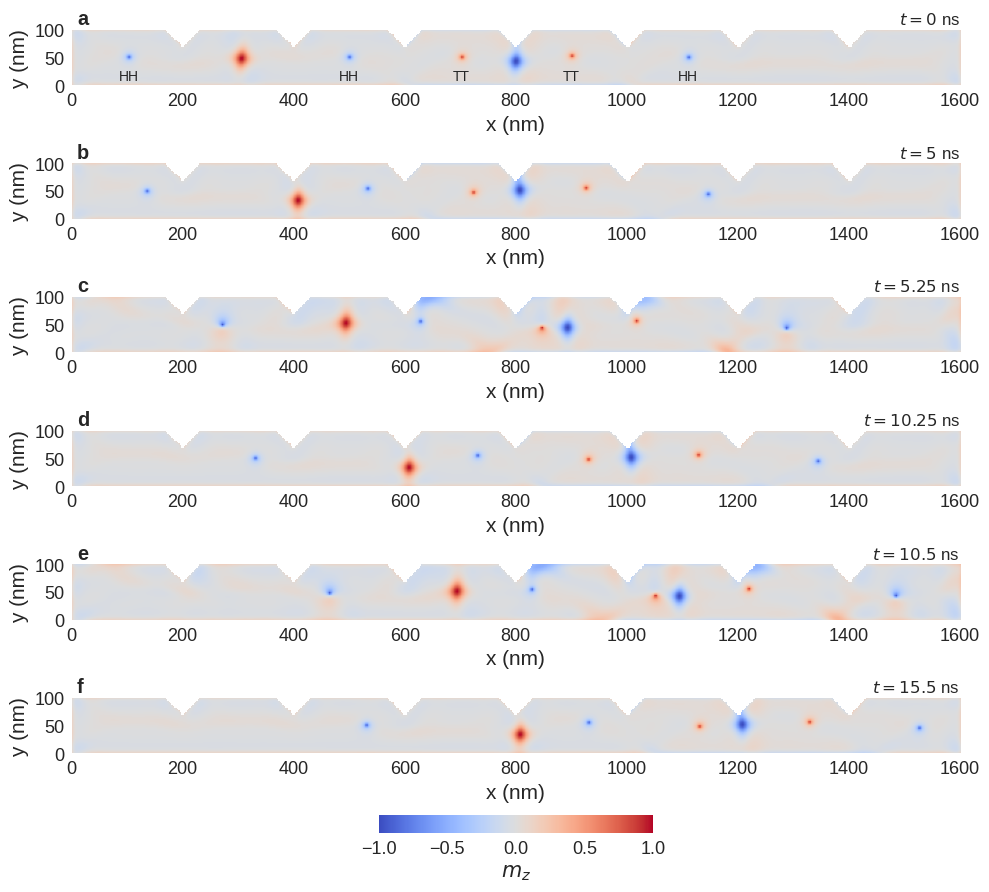

In [8]:
mosaic = """
aaa
bbb
ccc
ddd
eee
fff
.g.
"""
fig, axs = plt.subplot_mosaic(mosaic, figsize=(10, 9), layout='tight', gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 1, 0.2]})
data[1][-1].sel(z=1e-9).orientation.z.mpl.scalar(clim=(-1, 1), cmap='coolwarm', ax=axs['a'], colorbar=False, multiplier=1e-9)
for i, ax in zip(range(2, 7), "bcdef"):
    data[i][-1].sel(z=1e-9).orientation.z.mpl.scalar(clim=(-1, 1), cmap='coolwarm', ax=axs[ax], colorbar=False, multiplier=1e-9)

for pos, label in zip(pos_initial, ['HH', 'HH', 'TT', 'TT', 'HH']):
    axs["a"].text(pos, 10, label, horizontalalignment='center')

for label, time in zip('abcdef', ['0', '5', '5.25', '10.25', '10.5', '15.5']):
    axs[label].text(10, 110, label, fontweight='bold', fontsize='x-large')
    axs[label].text(1600, 110, f'$t={time}$ ns', ha='right', fontsize='large')
    
fig.colorbar(axs['a'].images[0], cax=axs['g'], orientation='horizontal', label='$m_z$')

In [ ]:
fig.savefig('Fig6.pdf')